Practicing linear regression

In [55]:
from imports import (
    np, pd, xr, plt, os, LinearRegression,
    metrics)

%matplotlib inline

In [56]:
nird_data = ''

model1 = '20191122_161009_sample_param_set_wbf1_inp1.nc'
model2 = '20191127_162007_sample_param_set_wbf0_01_inp1.nc'

case = model1[:-3]

model_dir = '/home/jonahks/drivemount/mnth15runs/%s/' % case

In [57]:
os.getcwd()

'/home/jonahks/git_repos/netcdf_analysis'

In [58]:
os.listdir(model_dir)

['MPC_COMPARE_CALIOP_NorESM.csv',
 '20191122_161009_sample_param_set_wbf1_inp1.cam.h0.0001-12.nc',
 '20191122_161009_sample_param_set_wbf1_inp1.cam.h0.0002-02.nc',
 '20191122_161009_sample_param_set_wbf1_inp1.cam.h0.0001-08.nc',
 '20191122_161009_sample_param_set_wbf1_inp1.cam.h0.0001-06.nc',
 '20191122_161009_sample_param_set_wbf1_inp1.cam.h0.0001-03.nc',
 '20191122_161009_sample_param_set_wbf1_inp1_slf_caliop_comparison.csv',
 '20191122_161009_sample_param_set_wbf1_inp1.nc',
 '20191122_161009_sample_param_set_wbf1_inp1.cam.h0.0001-05.nc',
 '20191122_161009_sample_param_set_wbf1_inp1_noresm_slf_isotherms.png',
 '20191122_161009_sample_param_set_wbf1_inp1.cam.h0.0002-03.nc',
 '20191122_161009_sample_param_set_wbf1_inp1.cam.h0.0001-07.nc',
 '20191122_161009_sample_param_set_wbf1_inp1.cam.i.0002-01-01-00000.nc',
 '20191122_161009_sample_param_set_wbf1_inp1.cam.h0.0001-09.nc',
 '20191122_161009_sample_param_set_wbf1_inp1.cam.h0.0001-04.nc',
 '20191122_161009_sample_param_set_wbf1_inp1.cam

In [59]:
data_string1 = '%s%s_slf_caliop_comparison.csv' % (model_dir, case)
os.path.exists(data_string)

True

In [60]:
ds = pd.read_csv(data_string1)
ds_clean = ds.dropna()

In [65]:
X_train = np.array(ds_clean['Isotherm']).reshape(-1,1)
y_train = np.array(ds_clean['Arctic Error']).reshape(-1,1)
sklearn_regressor = LinearRegression().fit(X_train, y_train) # Train with the right independent/dependent variables

score = sklearn_regressor.score(X_train, y_train) # R2 coefficient

#To retrieve the intercept:
print(sklearn_regressor.intercept_)#For retrieving the slope:
print(sklearn_regressor.coef_)

y_pred = sklearn_regressor.predict(X_train)

[-14.58026012]
[[-0.42770834]]


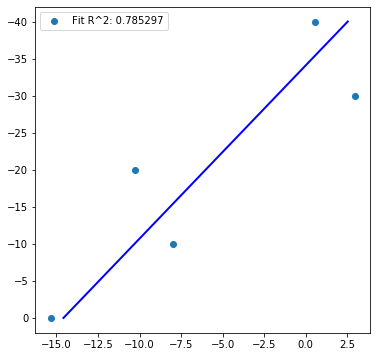

In [64]:
fig1 = plt.figure(figsize=(6,6))#constrained_layout=True)
fig1.gca().invert_yaxis()

plt.scatter(ds_clean['Arctic Error'], ds_clean['Isotherm'], label = ('Fit R^2: %f' % score))
plt.plot(y_pred, X_train, color='blue', linewidth=2)
plt.legend()
plt.show()